# **Prediction of Water Potability**<br>
**Team 5**: Sixuan Wang, Shih-Han Juan, Hejiang Wu, Jiadai Yu

Colab Link: https://colab.research.google.com/drive/1sWWoD6FkTFVPIcCL4fiGi7xeD8YbIop8?usp=sharing


## **Context and Motivation**<br>
Water quality has been a significant issue that affects billions of people around the world. According to WHO, 2.1 billion people, which is 1/4 of the global population, lack access to safely managed drinking water. Therefore, water potability assessment can be a valuable investment to the people, regions, and countries that suffer from water scarcity.<br>
<br>
Our project aims to develop a best-performing machine learning model to predict the potability of any observed water sample, using accessible indicators of water quality. A model as such would serve as an economical method in screening adequate water sources by reducing the time and cost of in-laboratory water quality tests which involve complex and costly procedures. We hope our work may contribute to the improvement of qualified water source detection practice and benefit organizations that care about water quality issues. 

## **Dataset**<br>
The dataset used in our project is obtained from Kaggle ([Kaggle Link](https://www.kaggle.com/datasets/adityakadiwal/water-potability)). It contains 3276 rows and 10 columns, each row representing an observed water sample. The target variable, Potability, is binary, with 1 indicating that the observed water is potable and 0 not potable. The other 9 variables are the observed water's features that we use to make predictions on water potability. A full list of variable descriptions is shown below:<br>
<br>
*   **Potability**: Target variable. 1 indicates that the water is potable; 0 indicates not potable<br>
*   **ph**: Indicates the acid_base balance of water. Maximum permissible limit of pH ranges from 6.5 to 8.5<br>
*   **Hardness**: Defined as the capacity of water to precipitate soap caused by Calcium and Magnesium<br>
*   **Solids**: Total dissolved solids. Desirable limit is 500 mg/L and the maximum limit is 1000mg/L<br>
*   **Chloramines**: Major disinfectants used in public water systems. Chlorine that levels up to 4 milligrams per liter is considered safe in drinking water<br>
*   **Sulfate**: Naturally occurring substances found in minerals, soil, and rocks, ranging from 3 to 30 mg/L in most freshwater supplies<br>
*   **Conductivity**: Measures the ionic process of a solution that enables it to transmit current. Should not exceed 400 μS/cm by WHO standards<br>
*   **Organic_carbon**: Comes from decaying natural organic matter and synthetic sources. Should be less than 2 mg/L in treated drinking water and less than 4 mg/Lit in source water used for treatment<br>
*   **Trihalomethanes**: Chemicals which may be found in water treated with chlorine. Up to 80 ppm is safe in drinking water<br>
*   **Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. The WHO recommended value is 5 NTU

## **1. Data Import, Cleaning and Explore**

### 1.1 Import Data

In [ ]:
# Load the dataset and view its structure and datatypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/BA810/'

random_state=1
df_raw = pd.read_csv(data_folder+'water_potability.csv')
display(df_raw.head(),df_raw.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


None

Upon reviewing the datatypes, we're satisfied with the target variable, Potability, being an integer and all the other variables being floats.

### 1.2 Data Cleaning

In [ ]:
# Check for missing values
df_raw.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values are found in three columns. We will take a deeper look into it to decide how to handle them.

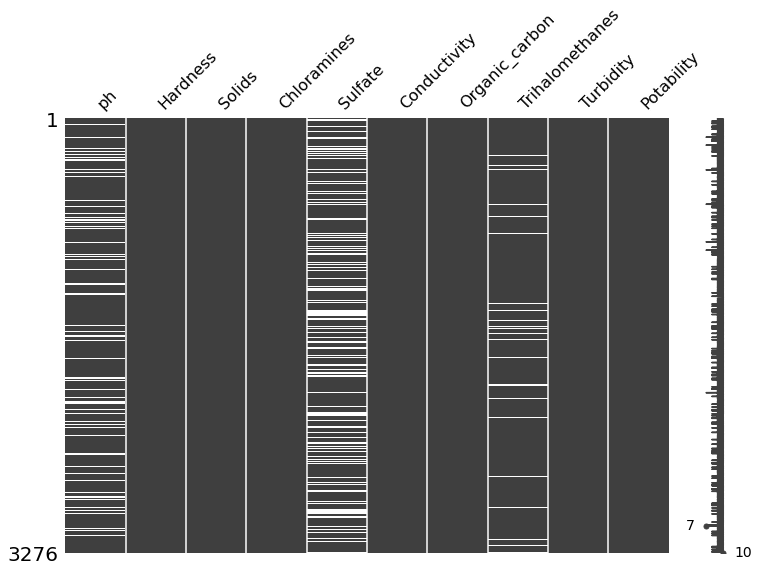

In [ ]:
# Check the distribution of the missing values
import missingno as msno
msno.matrix(df_raw,figsize=(12,8))
plt.show()

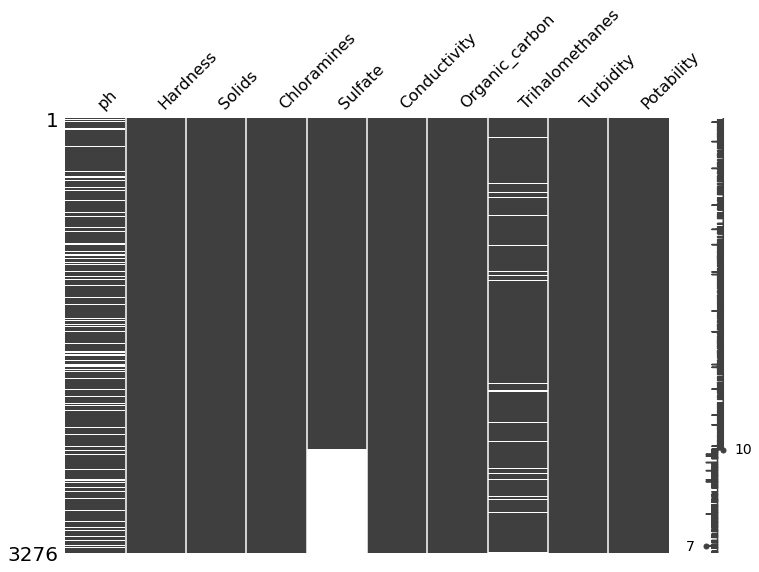

In [ ]:
# Sort Sulfate by ascending order to check if the missing values follow a certain pattern
msno.matrix(df_raw.sort_values('Sulfate'),figsize=(12,8))
plt.show()

Missing values are found in ph, Sulfate, and Trihalomethanes, and seem to distribute randomly. We decide to remove them instead of imputing them, because we want to reduce false positive predictions to remain conservative about water potability, while imputing them with averages or medians will likely make them prone to be potable (for example, the average of ph is around 7, which is within the permissible range of potable water) and thus result in more false positive predictions. Dropping the three columns would be another option, but it comes with the cost of losing potentially important predictors, which we will verify when checking feature importance.

In [ ]:
# Drop rows with missing values
df = df_raw.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


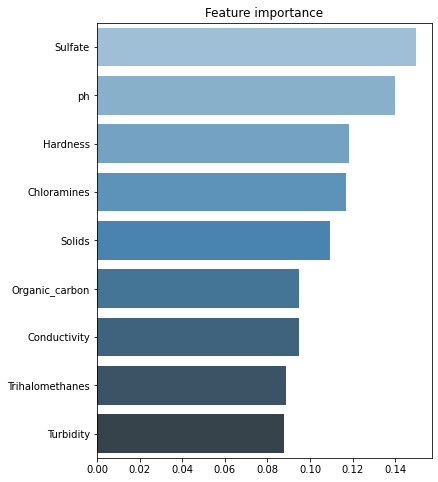

In [ ]:
# Check feature importance
from sklearn.ensemble import RandomForestClassifier

x, y = df.drop('Potability',axis=1),df['Potability']
# Fit RandomForest Classifier
clf = RandomForestClassifier()
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

As it turns out, Sulfate and ph are two main contributors to water potability and should therefore not be dropped due to missing values.

In [ ]:
# Check for duplicated rows
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


No duplicated rows are found. Now that we have a tidy dataset, we will start to explore it.

### 1.3 Exploratory Data Analytics

In [ ]:
# Have a look at the target variable
df['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

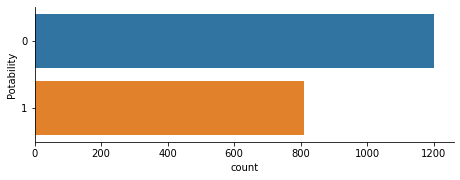

In [ ]:
ax = sns.catplot(y="Potability", kind="count", data=df, height=2.6, aspect=2.5)

In [ ]:
df.groupby('Potability').size()/df.shape[0]

Potability
0    0.596718
1    0.403282
dtype: float64

About 40% of the records are potable water, and 60% are not potable water. The distribution of the target variable is relateively balanced, so there is no need to resampling.

In [ ]:
# View the summry statistics
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


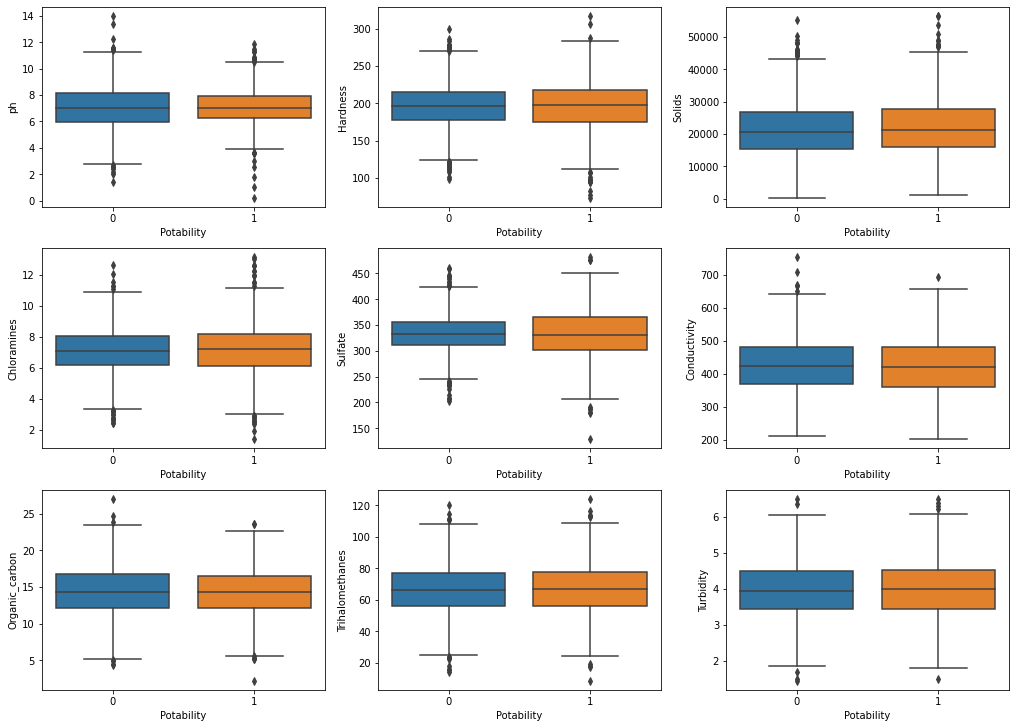

In [ ]:
# Visualize the predictors
fig1, ax1 = plt.subplots(3,3,constrained_layout=True, figsize=(14, 10))

sns.boxplot(x='Potability',y='ph',data=df,ax=ax1[0][0])

sns.boxplot(x='Potability',y='Hardness',data=df,ax=ax1[0][1])

sns.boxplot(x='Potability',y='Solids',data=df,ax=ax1[0][2])

sns.boxplot(x='Potability',y='Chloramines',data=df,ax=ax1[1][0])

sns.boxplot(x='Potability',y='Sulfate',data=df,ax=ax1[1][1])

sns.boxplot(x='Potability',y='Conductivity',data=df,ax=ax1[1][2])

sns.boxplot(x='Potability',y='Organic_carbon',data=df,ax=ax1[2][0])

sns.boxplot(x='Potability',y='Trihalomethanes',data=df,ax=ax1[2][1])

sns.boxplot(x='Potability',y='Turbidity',data=df,ax=ax1[2][2])

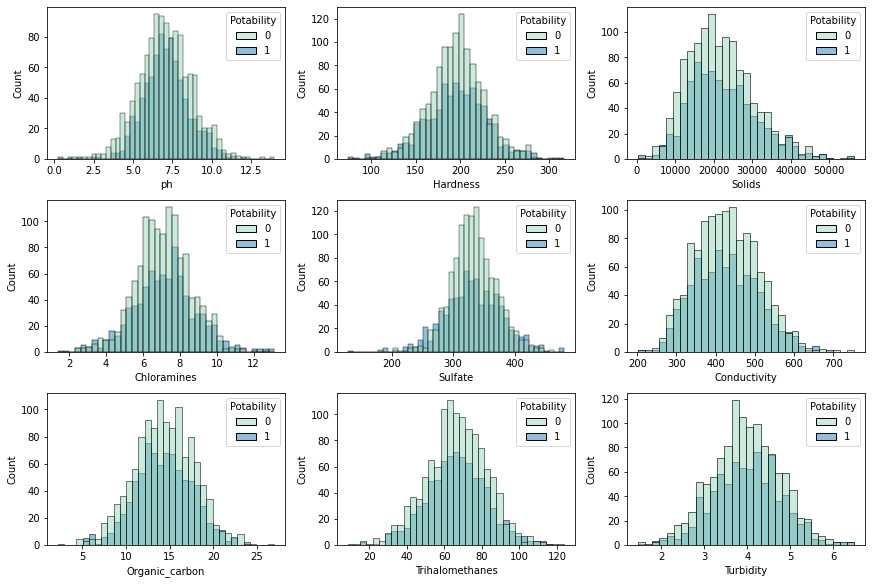

In [ ]:
# Check the distribution of each predictor
fig, ax =plt.subplots(3,3,constrained_layout=True, figsize=(12, 8))

axesSub = sns.histplot(data=df, x='ph', hue="Potability",palette='YlGnBu',ax=ax[0][0])

axesSub = sns.histplot(data=df, x='Hardness', hue="Potability",palette='YlGnBu',ax=ax[0][1])

axesSub = sns.histplot(data=df, x='Solids', hue="Potability",palette='YlGnBu',ax=ax[0][2])

axesSub = sns.histplot(data=df, x='Chloramines', hue="Potability",palette='YlGnBu',ax=ax[1][0])

axesSub = sns.histplot(data=df, x='Sulfate', hue="Potability",palette='YlGnBu',ax=ax[1][1])

axesSub = sns.histplot(data=df, x='Conductivity', hue="Potability",palette='YlGnBu',ax=ax[1][2])

axesSub = sns.histplot(data=df, x='Organic_carbon', hue="Potability",palette='YlGnBu',ax=ax[2][0])

axesSub = sns.histplot(data=df, x='Trihalomethanes', hue="Potability",palette='YlGnBu',ax=ax[2][1])

axesSub = sns.histplot(data=df, x='Turbidity', hue="Potability",palette='YlGnBu',ax=ax[2][2])

Each feature follows a roughly normal distribution with minor skewness and no outliers. Though there are more impotable records than potable water samples, the two categories of potability still share a similar pattern.

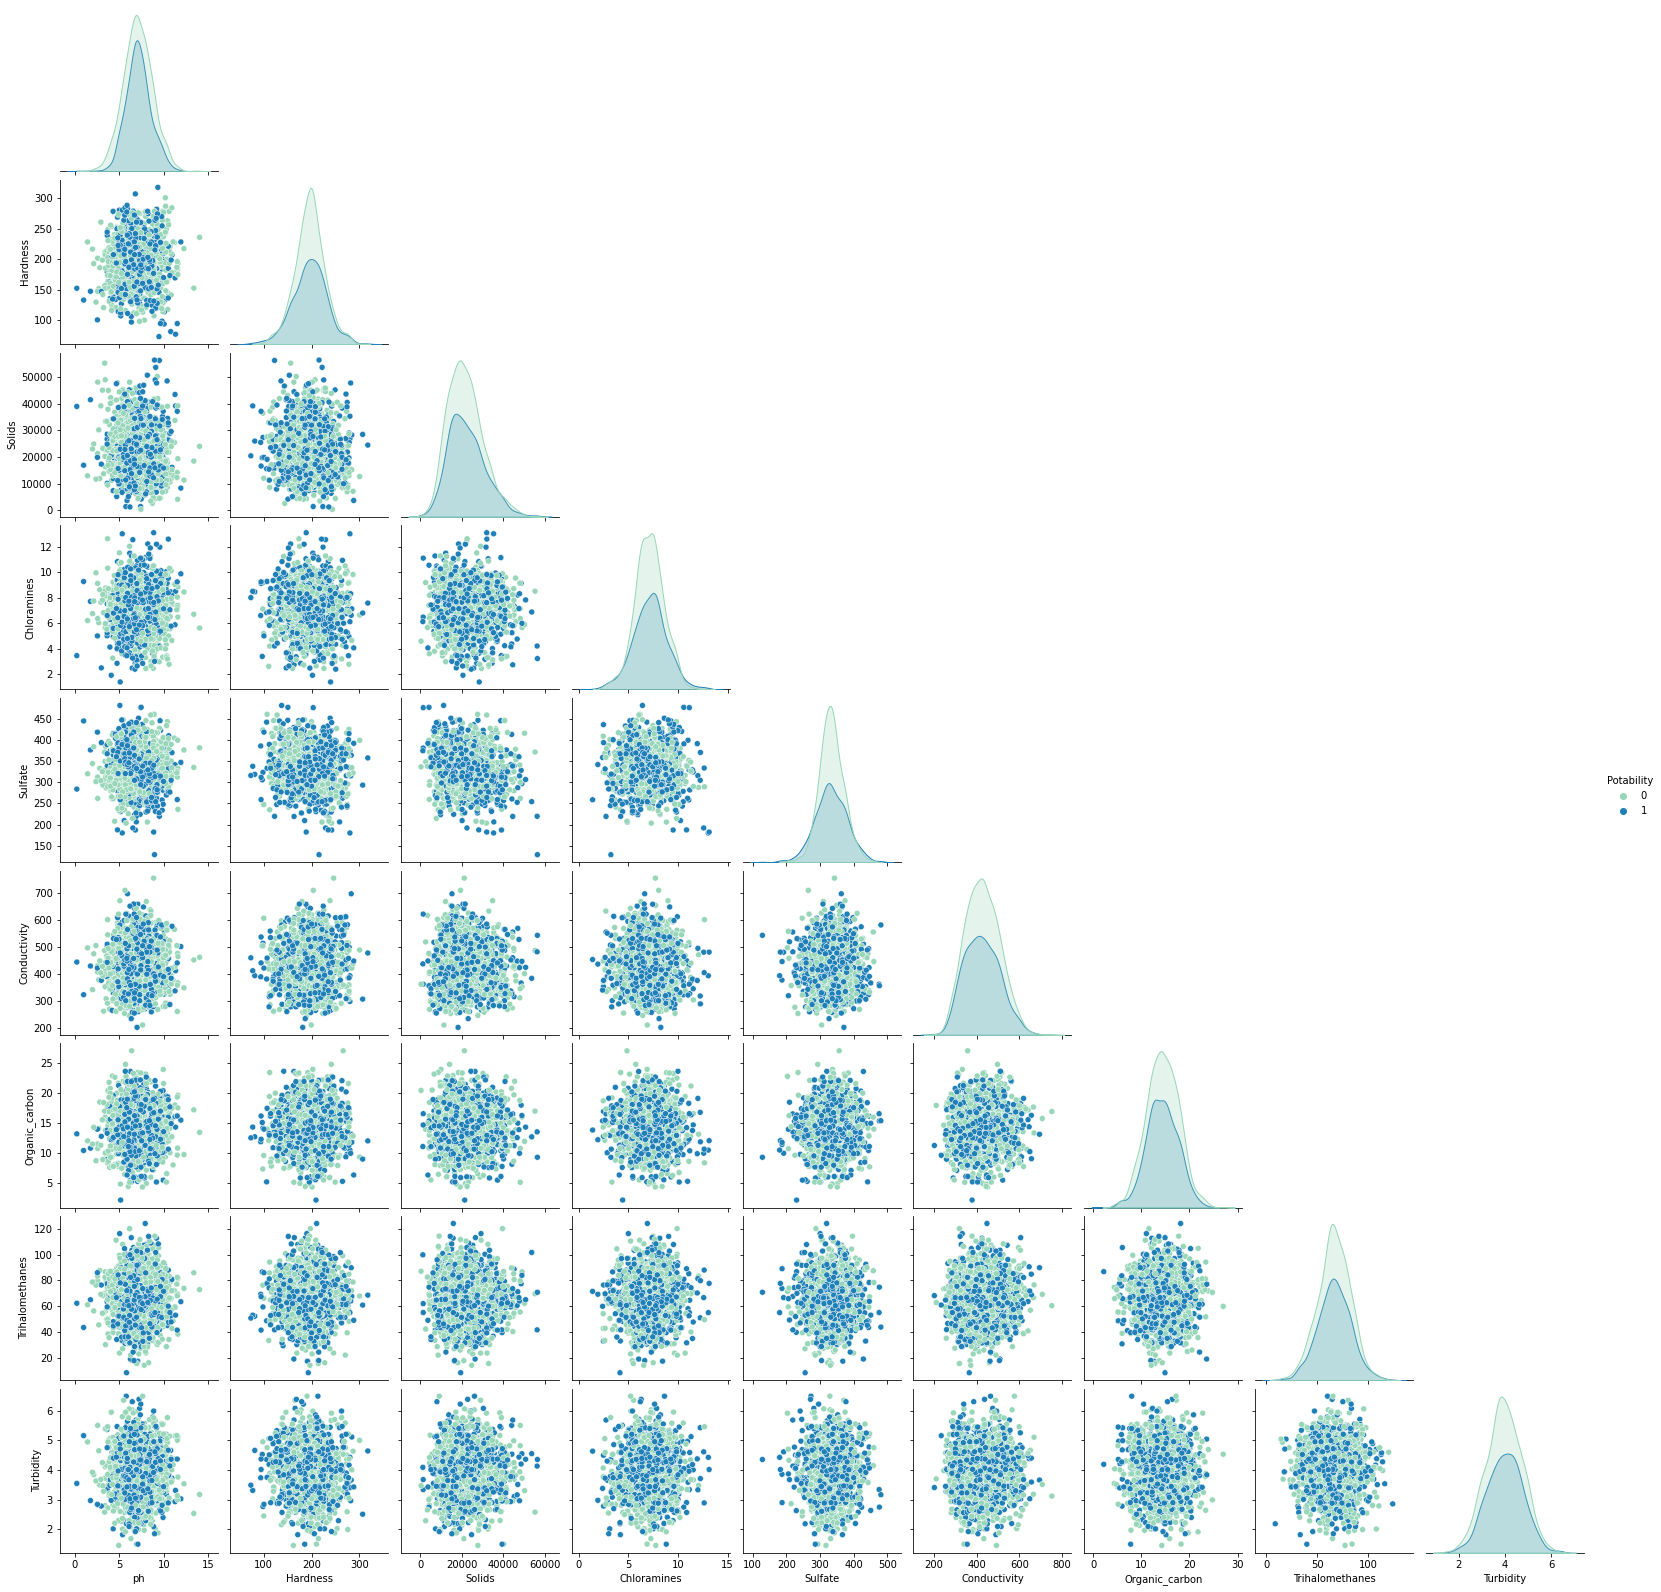

In [ ]:
# Graph a pairplot to see if there is any correlation between predictors
sns.pairplot(df, hue="Potability", palette='YlGnBu', corner = True)

There is no obvious correlation between predictors, and no difference between targets, which indicates that no collinearity exist, and nonlinear models may work better than linear models.

## **2. Modeling**

In [ ]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

num_attribs = df.columns.values.tolist()[:-1]
preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['ph', 'Hardness', 'Solids', 'Chloramines',
                                  'Sulfate', 'Conductivity', 'Organic_carbon',
                                  'Trihalomethanes', 'Turbidity'])])

In [ ]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = preprocess_pipeline.fit_transform(train_set[num_attribs])
y_train = train_set["Potability"].values

X_test = preprocess_pipeline.fit_transform(test_set[num_attribs])
y_test = test_set["Potability"].values

### 2.1 Logistic Regression

In [ ]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline

logistic = LogisticRegression()
logistic.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print('Test accuracy was', accuracy_score(y_test, logistic.predict(X_test)))

Test accuracy was 0.5707196029776674


In [ ]:
# LogisticRegression with feature selection
from sklearn.feature_selection import SequentialFeatureSelector

preprocess_pipeline_1 = Pipeline([
    ('prep', preprocess_pipeline),
    ('select', SequentialFeatureSelector(LogisticRegression(), n_features_to_select=1.0)),
])

full_pipeline = make_pipeline(preprocess_pipeline_1, LogisticRegression())

from sklearn.model_selection import cross_val_score

log_reg = make_pipeline(preprocess_pipeline_1, LogisticRegression())
log_test_rmses = -cross_val_score(log_reg, train_set[num_attribs], train_set["Potability"],
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.2f}'.format(log_test_rmses.mean()))

Test data error 0.63


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = ({
    'pipeline__select__n_features_to_select': np.arange(1, 9, 1)
})

grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(train_set[num_attribs], train_set["Potability"])
grid_search.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardize',
                                                                                    StandardScaler())]),
                                                                   ['ph',
                                                                    'Hardness',
                                                                    'Solids',
                                                                    'Chloramines',
                                                                    'Sulfate',
                                                                    'Conductivity',
                                                                    'Organic_carbon',
                                                                    'Trihalomethanes',
                                                                    'Turbidity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LogisticRegression(),
                                                            n_features_to_select=5))])),
                ('logisticregression', LogisticRegression())])

{'pipeline__select__n_features_to_select': 5}
0.6279109948150753


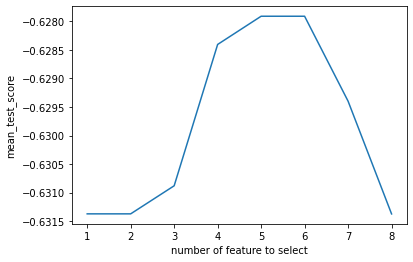

In [ ]:
print(grid_search.best_params_) # Number of columns that were kept
print(-grid_search.best_score_) # RMSE obtained at that

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

sns.lineplot(x='param_pipeline__select__n_features_to_select', y='mean_test_score', data=cv_res,ci= None).set( xlabel='number of feature to select')
sns.set_style("darkgrid")

We first applied logistic regression model with all the features, and get the result of test accuracy of 0.57, this is not satisfying, so we updated the pipeline to perform grid search on number of features. The test score maximized to 0.6279 when 5 features are selected.
These is consistent with our discussion for feature importance, that some features have the importance below 0.1, including them in the model leads to overfitting and harms the accuracy.

### 2.2 Naïve Bayes  
We decided to skip Naïve Bayes model for the following reasons:  
First, Naïve Bayes usually performs better with a small dataset, while our dataset has more than 2000 samples.  
More importantly, Naïve Bayes model is built on the assumption of independence among features, but according to natural science principles, these indicators of water quality are interrelated.

### 2.3 KNN

* Grid Search
* n_neighbors: from 1 to 10

We iterate all the n_neighbors from 1 to 10 and use grid search to evaluate the performance of different k. We have the following figure as a result, which tells us we should choose n_neighbors=6.

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print('Test accuracy was', accuracy_score(y_test, knn.predict(X_test)))

Test accuracy was 0.6277915632754343


In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = list(range(1,10))
param_gridknn = dict(n_neighbors = k_range)
gridKNN = GridSearchCV(knn, param_gridknn, cv=10, scoring='accuracy', verbose=1)
gridKNN.fit(X_train, y_train)
print('best score is:', str(gridKNN.best_score_))
print('best params are:', str(gridKNN.best_params_))

grid_cv_res = pd.DataFrame(gridKNN.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score is: 0.6386723602484472
best params are: {'n_neighbors': 6}


,param_n_neighbors,mean_test_score
5,6,0.638672
3,4,0.637411
7,8,0.636782
6,7,0.633688
8,9,0.633649
1,2,0.632469
4,5,0.621852
2,3,0.616922
0,1,0.597632


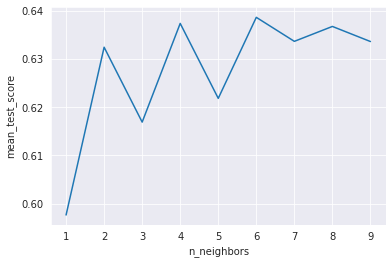

In [ ]:
df_knn = grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)
average_price_over_past_10_years = sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=df_knn,ci= None).set( xlabel='n_neighbors')
sns.set_style("darkgrid")

In [ ]:
model = gridKNN.best_estimator_

pred_y = model.predict(X_test)
print('The cost under best prediction strategy is %f.' % accuracy_score(y_test, pred_y))

The cost under best prediction strategy is 0.637717.


### 2.4 SVM

* Halving Random search
* Kernel
    * Linear
    * polynomial
    * Radial
* Cost

We used three different kernels, linear, polynomial, and radial. We also used Halving Random search to find the best cost value. We find out that the radial kernel gives the best result.

In [ ]:
# SVM
from sklearn.svm import SVC

lin_svc = SVC(C=1, kernel='poly', degree=1) 
lin_svc.fit(X_train, y_train)

print(lin_svc.n_support_) # prints the numbers of support vectors for each class. 

from sklearn.metrics import accuracy_score
print('Test accuracy was', accuracy_score(y_test, lin_svc.predict(X_test)))

[658 639]
Test accuracy was 0.5732009925558312


In [ ]:
#Halving Random search

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import loguniform, randint

svm_pipeline = Pipeline([
    ("svm", SVC()),
])

'''
param_distr = [
  {'svm__kernel': ['linear'], 'svm__C': loguniform(1e-1, 1e+3)},
  {'svm__kernel': ['rbf'], 'svm__C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001]},
  {'svm__kernel': ['poly'], 'svm__C': loguniform(1e-1, 1e+3), 'svm__gamma': loguniform(1e-3, 1), 'svm__degree': randint(2, 5)},
]
'''

param_distr = [
  {'svm__kernel': ['linear'], 'svm__C': loguniform(0.1, 1)},
  {'svm__kernel': ['rbf'], 'svm__C': [1e-1, 1]},
  {'svm__kernel': ['poly'], 'svm__C': loguniform(0.1, 1)},
]

halving_random_search = HalvingRandomSearchCV(svm_pipeline, param_distr, 
                                      n_candidates=25, cv=3, 
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy', 
                                      random_state=42)
halving_random_search.fit(X_train, y_train)
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)

halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)

halving_random_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()

,iter,n_resources,param_svm__C,param_svm__kernel,mean_test_score
34,2,1602,1,rbf,0.633558
35,2,1602,1,rbf,0.633558
36,2,1602,1,rbf,0.633558
28,1,534,1,rbf,0.587873
29,1,534,1,rbf,0.587873


In [ ]:
lin_svc_best = SVC(C=1, kernel='rbf') 
lin_svc_best.fit(X_train, y_train)

print(lin_svc_best.n_support_) # prints the numbers of support vectors for each class. 

from sklearn.metrics import accuracy_score
print('The cost under best prediction strategy is', accuracy_score(y_test, lin_svc_best.predict(X_test)))

[644 588]
The cost under best prediction strategy is 0.6823821339950372


### 2.5 Decision tree 

* Grid Search
* ccp_alpha

For the decision tree method, we used a cross validation with grid search to find the best alphas. We drew the following trees and get the test accuracy.

Test accuracy was 0.6029776674937966


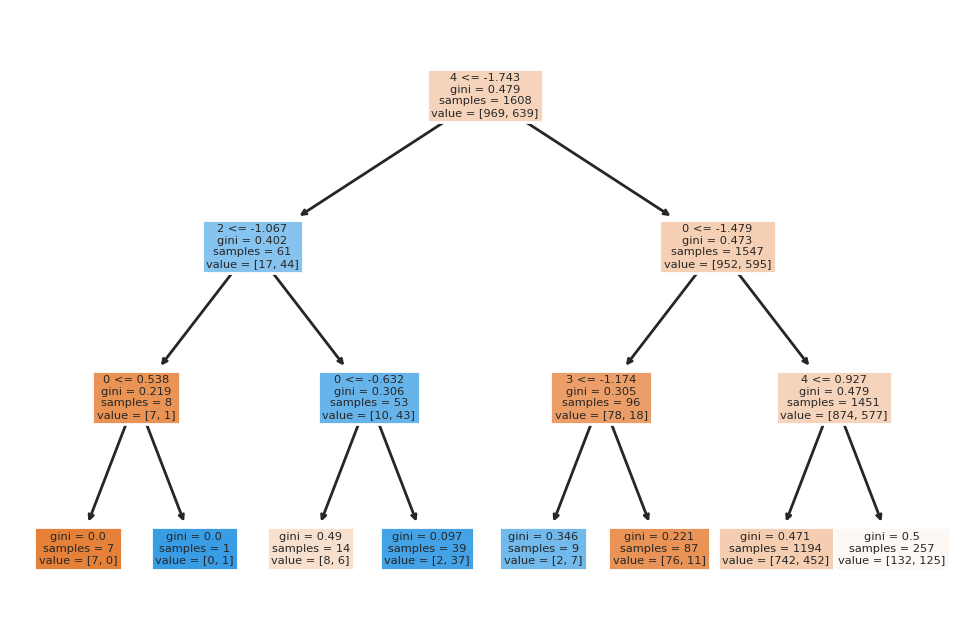

In [ ]:
# Decision tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X_train, y_train)
plt.figure(dpi=200) 
X_train_pd = pd.DataFrame(X_train)
plot_tree(clf, filled=True, feature_names=list(X_train_pd.columns)); # graphically shows the tree
print('Test accuracy was', accuracy_score(y_test, clf.predict(X_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_full = DecisionTreeClassifier().fit(X_train, y_train) 
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 

clfs = []
for ccp_alpha in ccp_alphas:
    clf_i = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, max_leaf_nodes = 12)
    clf_i.fit(X_train, y_train)
    clfs.append(clf_i)

param_grid = {'ccp_alpha': ccp_alphas}  

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_ccp_alpha,mean_test_score
154,0.003017,0.648010
155,0.003378,0.642424
158,0.003552,0.638074
157,0.003475,0.638074
156,0.003467,0.638074
...,...,...
110,0.001532,0.600762
104,0.001476,0.600760
105,0.001486,0.600760
100,0.001421,0.600755


Test accuracy was 0.6426799007444168


(23, 6)

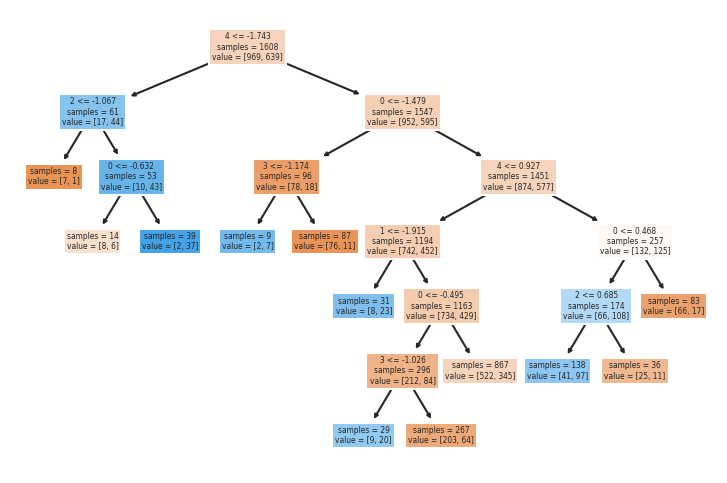

In [ ]:
from sklearn.metrics import accuracy_score

clf_opt = clfs[grid_cv_res.index[0]]  
plt.figure(dpi=150) 
X_train_pd = pd.DataFrame(X_train)
plot_tree(clf_opt, filled=True, feature_names=list(X_train_pd.columns), impurity=False) # opt

print('Test accuracy was', accuracy_score(y_test, clf_opt.predict(X_test)))
clf_opt.tree_.node_count, clf_opt.tree_.max_depth

### 2.6 RF

* Grid Search
* n_estimators
* min_samples_leaf

In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print('Test accuracy was', accuracy_score(y_test, forest_clf.predict(X_test)))

Test accuracy was 0.6600496277915633


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = [ 
      {'n_estimators': [10,110,200],
        'min_samples_split': [2, 3, 5, 8]}
    ]
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, 
                                 scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

print('Test accuracy was', accuracy_score(y_test, grid_search.predict(X_test)))

cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

Test accuracy was 0.674937965260546


,param_min_samples_split,param_n_estimators,mean_test_score
8,5,200,0.619415
7,5,110,0.617868
11,8,200,0.614006
4,3,110,0.613439
2,2,200,0.612940


### 2.7 Ensemble

* Voting classifiers
    * LogisticRegression
    * DecisionTree
    * SVC
* Stacking

Voting classifiers allow us to combine the predictions of LogisticRegression, DecisionTree and SVC. The score of voting classifiers is 65.01%. We also use the stacking approach and get the score of 63.52%.


In [ ]:
# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
    # hard voting
)

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

print('Test accuracy was', accuracy_score(y_test, voting_clf.predict(X_test)))

lr = 0.5707196029776674
dt = 0.6253101736972705
svc = 0.6823821339950372
Test accuracy was 0.6501240694789082


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))

    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5  
)
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
print('Test accuracy was', accuracy_score(y_test, stacking_clf.predict(X_test)))

Test accuracy was 0.6352357320099256


### 2.8 Adjusted Cost matrix


Consider the real world situation, we want to increase the criteria of potable when we select water samples. Thus, we make a rule that the cost of false positive is 4 times the cost of false negative. In other words, only samples with a probability of predicting 1 higher than 80% will be predicted as 1 (potable).

In [ ]:
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score

def default_cost(y_true, y_pred): 
   cm = confusion_matrix(y_true, y_pred)
   return cm[1,0] * 4 + cm[0,1] * 1 

cost_scorer = make_scorer(default_cost, greater_is_better=False)

We will try 3 models using this cost matrix and calculate their cross validation score. The candidate models are random forest, SVM and 

In [ ]:
forest_costs = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring=cost_scorer)
print(abs(forest_costs.mean()))

svm_costs = cross_val_score(lin_svc_best, X_train, y_train, cv=3, scoring=cost_scorer)
print(abs(svm_costs.mean()))

voting_costs = cross_val_score(voting_clf, X_train, y_train, cv=3, scoring=cost_scorer)
print(abs(voting_costs.mean()))

586.6666666666666
581.3333333333334
649.0


## **Results**

### Result for default cost matrix


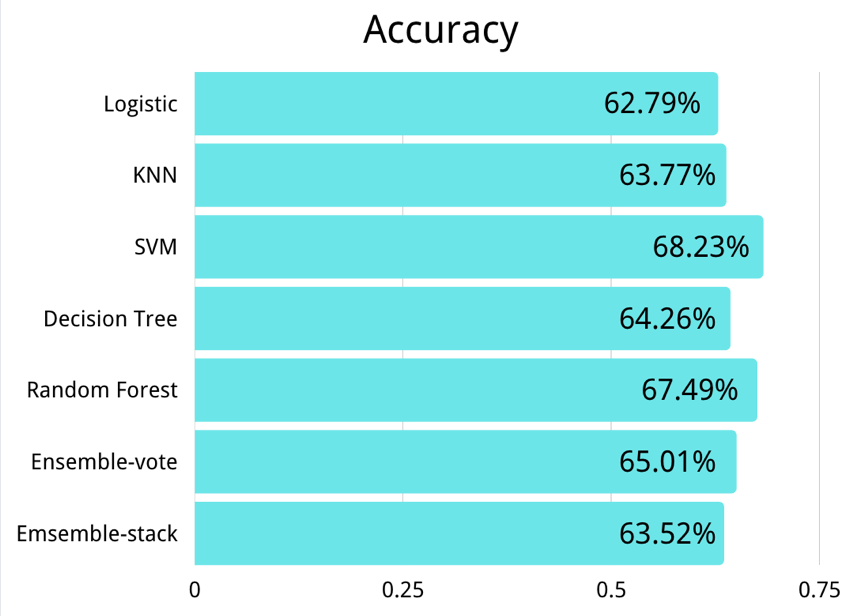

SVM becomes our best model with 68.23% test accuracy. There are mainly two reasons for this. First, the model perform well on high-dimensional data with non-linear relationship, and that's the exact case of our dataset. Second, SVM contains a regularization parameter that prevent overfitting problems.

### Result for adjusted cost matrix


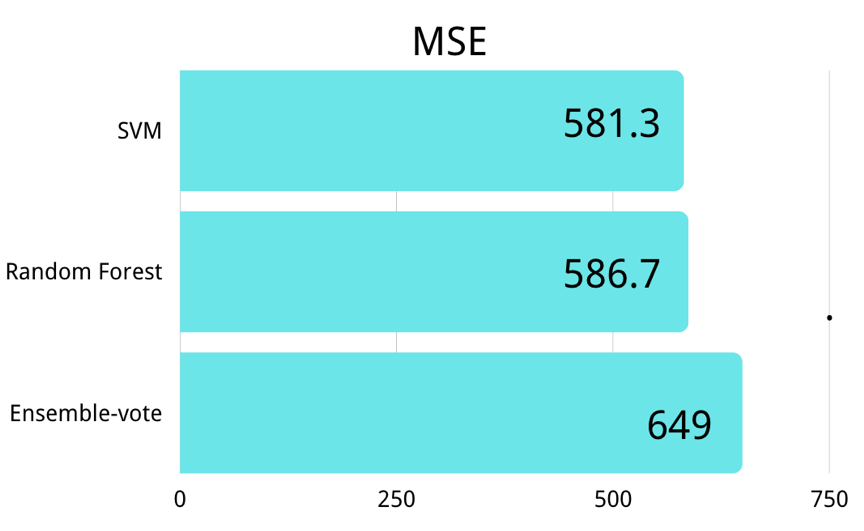

Applying the adjusted cost matrix, our evaluation criteria will be the MSE score. In this case, SVM is still our best model.

## **Challenge and Conclusion**

For both default and adjusted cost matrix, SVM is always our best model. **The biggest challenge we have encountered is combining the model with the real-world cases.** We have showed an example of selecting high quality water by redesigning the cost matrix. However, in some regions in Africa, they have severe water shortages. For those cases, we may need to lower the potability criteria to maximize the use of water resources. Thus, we need to make false negative cases more costly than false positive ones, because seeking water sources would probably cost more than in-laboratory water quality tests. Also, the change of cost matrix is only one way that we can adjust our models. In conclusion, **when we apply our models to real-world cases, it usually should be a case by case study**. 

## **References**

* http://www.mwra.com/water/html/awqr.htm
* https://www.cdc.gov/healthywater/drinking/drinking-water-faq.html
* https://www.un.org/en/events/waterdecade/#:~:text=In%20order%20to%20accelerate%20efforts%20towards%20meeting%20water-related,end%20on%20World%20Water%20Day%2C%2022%20March%202028.
* https://www.kaggle.com/datasets/adityakadiwal/water-potability
* https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations